# DTSA 5509 Final Project Summary

Dim reduction
    PCA
    T-SNE
Clustering
    Kmeans MiniBatchKMeans(batch_size=256*14)

# Data Summary

### Import Python Packages

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np


from IPython.display import display, Markdown
from ucimlrepo import fetch_ucirepo 

import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

### Data Source  
data source info...  
https://archive.ics.uci.edu/dataset/464/superconductivty

In [3]:
# Import dataset
superconductor_dataset_dict = fetch_ucirepo(id=464)

# View raw dataset
df = superconductor_dataset_dict.data.original
# df

### Dataset Info
- df.info() provides a concise summary of a DataFrame, including the:
    - Number of rows
    - Column names
    - Data types
- It also shows the count of non-null entries for each column, which makes it easy to identify missing values.
- In addition, it displays the memory usage of the DataFrame, helping to assess the size and efficiency of the dataset in memory.

In [4]:
# Downcast floats and integer datatypes to minimize memory usage 
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='float') 
for col in df.select_dtypes(include=['int64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='integer')

# Inspect column data types and size of the dataframe
# df.info()

### Dataset Metadata Summary
The table below provides the metadata of each column in our dataset:

In [ ]:
# Create a dataframe of the dataset metadata (as provided by the data source)
superconductor_metadata_df = superconductor_dataset_dict.variables

# Display a markdown table of the metadata for each column
display(Markdown(superconductor_metadata_df.to_markdown(index=False)))

> The `critical_temp` column will be removed from the dataset for before conducting unsupervised learning. It will later be re-introduced as a supervised learning target variable when we are comparing our unsupervised learning approach to supervised learning methods.

### Feature Descriptions
- The features are grouped into 8 general categories:  

Feature Group | Description
---|---
Atomic mass | 
FIE | 
Atomic radius | 
Density | 
Electron affinity | 
Fusion heat | 
Valence | 

- Each of the feature groups are each quantified using a set of measurements:  

Measurement Type | Description
---|---
mean | 
wtd_mean | 
gmean | 
wtd_gmean | 
entropy | 
wtg_entropy | 
range | 
wtd_range | 
std | 
wtd_std | 

# EDA

### Functions used for EDA

In [ ]:
# Function to plot a set of histograms for a subset of columns
def plot_column_histograms(subset):
    # Melt the numeric columns into one column
    df_melt = df[subset].melt(var_name='feature', value_name='value')

    # Create a base Altair histogram chart
    chart = alt.Chart(df_melt).mark_bar().encode(
        x = alt.X('value:Q', 
                axis=alt.Axis(title=''), 
                scale=alt.Scale(zero=False),
                bin=alt.Bin(maxbins=50)),
        y = alt.Y('count():Q', 
                axis=alt.Axis(title='')),
        # color = alt.Color('feature:N', legend=None)
    ).properties(
        width=175,
        height=150
    )

    # Display a histogram for each numeric_columns
    chart = alt.ConcatChart(
        concat=[
        chart.transform_filter(alt.datum.feature == value).properties(title=value)
        for value in subset
        ],
        columns=5
    ).configure_title(
        fontSize=10
    ).resolve_axis(
        x='independent',
        y='independent'
    ).resolve_scale(
        x='independent', 
        y='independent'
    )

    return chart

### Check for Missing Values
- This checks if any values are missing in the dataset

In [ ]:
df.isna().sum().sum()

### Define Column Groups
- These groups will be used for EDA purposes, and during the Pre-Processing stage

In [ ]:
# Define subsets of columns to be used for modeling
other_cols = ['number_of_elements', 'critical_temp']
atomic_mass_cols = [col for col in df.columns if 'atomic_mass' in col]
fie_cols = [col for col in df.columns if 'fie' in col]
atomic_radius_cols = [col for col in df.columns if 'atomic_radius' in col]
density_cols = [col for col in df.columns if 'Density' in col]
electron_affinity_cols = [col for col in df.columns if 'ElectronAffinity' in col]
fusion_heat_cols = [col for col in df.columns if 'FusionHeat' in col]
thermal_conductivity_cols = [col for col in df.columns if 'ThermalConductivity' in col]
valence_cols = [col for col in df.columns if 'Valence' in col]

### Column Distributions & Descriptive Statistics
- Something about the distributions................
- The descriptive statistics summary gives us high level insights for each feature, including the:
  - Values counts
  - Mean
  - Standard Deviation
  - Minimum values
  - 25th, 50th, and 75th Quartiles
  - Maximum values
- These statistics can be used to get a general sense of the distribution of each numerical feature, and to possibly detect any numerical outliers.

In [ ]:
# Plot distributions for the other_cols
display(plot_column_histograms(other_cols))

# Descriptive statistics for the 'number_of_elements', 'critical_temp' columns
df[other_cols].describe().transpose()

In [ ]:
# Plot distributions for the atomic_mass_cols
display(plot_column_histograms(atomic_mass_cols))

# Descriptive statistics for the atomic_mass_cols
df[atomic_mass_cols].describe().transpose()

In [ ]:
# Plot distributions for the fie_cols
display(plot_column_histograms(fie_cols))

# Descriptive statistics for the fie_cols
df[fie_cols].describe().transpose()

In [ ]:
# Plot distributions for the atomic_radius_cols
display(plot_column_histograms(atomic_radius_cols))

# Descriptive statistics for the atomic_radius_cols
df[atomic_radius_cols].describe().transpose()

In [ ]:
# Plot distributions for the density_cols
display(plot_column_histograms(density_cols))

# Descriptive statistics for the density_cols
df[density_cols].describe().transpose()

In [ ]:
# Plot distributions for the electron_affinity_cols
display(plot_column_histograms(electron_affinity_cols))

# Descriptive statistics for the electron_affinity_cols
df[electron_affinity_cols].describe().transpose()

In [ ]:
# Plot distributions for the fusion_heat_cols
display(plot_column_histograms(fusion_heat_cols))

# Descriptive statistics for the fusion_heat_cols
df[fusion_heat_cols].describe().transpose()

In [ ]:
# Plot distributions for the thermal_conductivity_cols
display(plot_column_histograms(thermal_conductivity_cols))

# Descriptive statistics for the thermal_conductivity_cols
df[thermal_conductivity_cols].describe().transpose()

In [ ]:
# Plot distributions for the valence_cols
display(plot_column_histograms(valence_cols))

# Descriptive statistics for the valence_cols
df[valence_cols].describe().transpose()

> Column distribution observations here.........

### Column Correlations
- We need to check if there exists strong correlations between the numeric features. If there are then we should consider dropping one or more of the correlated features from the dataset.
- To aid in this evaluation we will visualize the data using a heatmap, where values of `[-1,1]` indicate as strong correlation, and values close to `0` indicate a weak correlation.
  - Note: Only the correlation values between `[-1.0, -0.5]` and `[0.5, 1.0]` are colored in the heatmap in order to focus on the highly correlated variables.

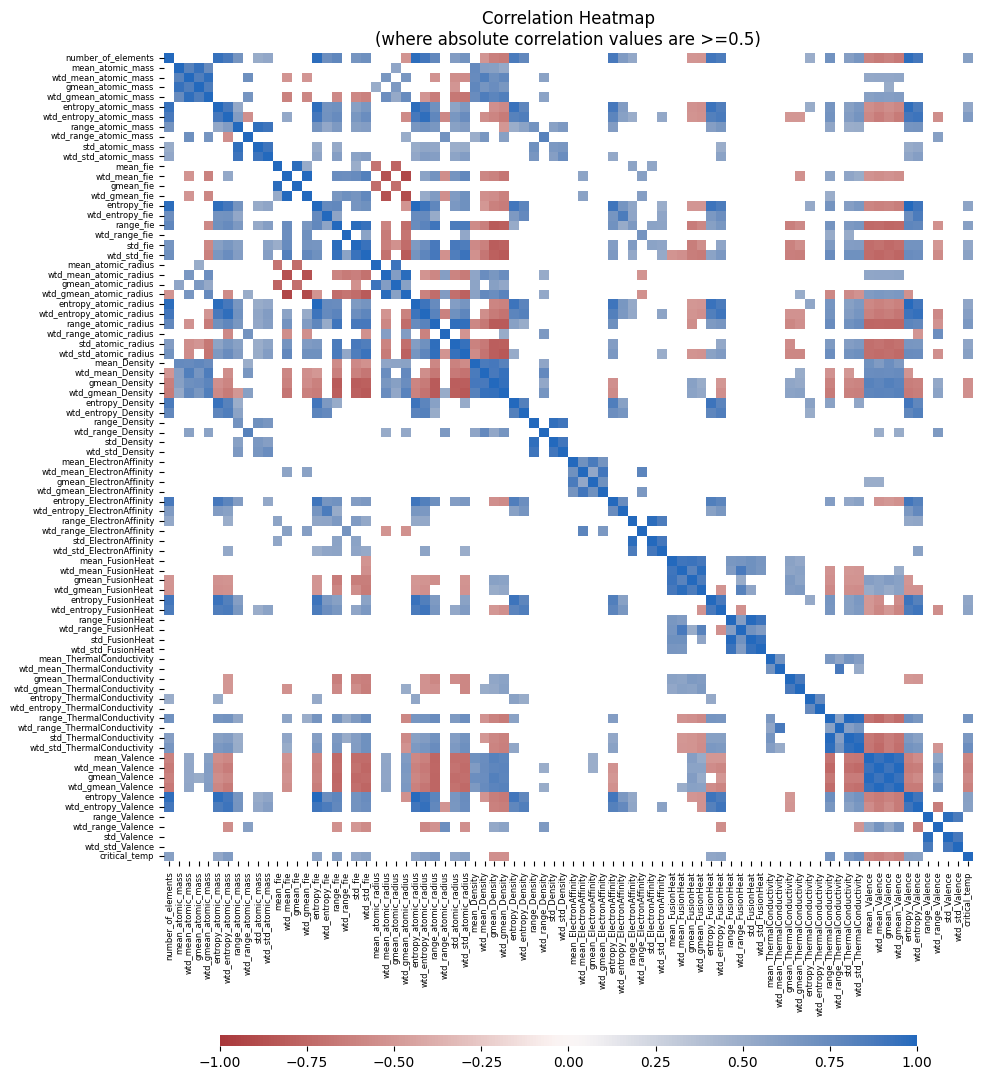

In [21]:
# Correlation Heatmap
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(
    df.corr(),
    cmap='vlag_r',
    mask=abs(df.corr())<=0.5, # Plot only absolute correlation values that are >=0.5
    square=True,
    vmin=-1, vmax=1,
    xticklabels=True, yticklabels=True,
    cbar_kws={'location':'bottom', 'aspect':60, 'shrink':0.6}
)
plt.xticks(fontsize=6) 
plt.yticks(fontsize=6) 
plt.title('Correlation Heatmap\n(where absolute correlation values are >=0.5)')
plt.show()

> Heatmap observations......

### EDA - Conclusions/Discussions/Next Steps:
- 

# Data Cleaning
fdsasdf

# Pre-Processing

### Data Scaling
- 

In [ ]:
numeric_transformer = SkPipeline([
    ('scaler', StandardScaler())
])

preprocessor_transformer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X)
    ],
    remainder='drop'
)

# Clustering

### Clustering Silhouette Scores
- Code below is a modified version based on an example given by sklearn (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([x/10 for x in range(-10,11,2)])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()